<a href="https://colab.research.google.com/github/amaniayeb/object_recognition_using_CNN/blob/main/Object_Recognition_(Jupyter_Notebook).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In this project, we will learn to:
* Import datasets from Keras
* Use one-hot vectors for categorical labels
* Addlayers to a Keras model
* Load pre-trained weights
* Make predictions using a trained Keras model

The dataset we will be using is the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

### 1. Loading the Data



In [2]:
pip install keras tensorflow


In [34]:

# Correct imports for loading CIFAR-10 dataset
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [35]:

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [36]:
# Lets determine the dataset characteristics
print('Training Images: {}'.format(x_train.shape))
print('Testing Images: {}'.format(x_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [6]:
# Now for a single image
print(x_train[0].shape)

(32, 32, 3)


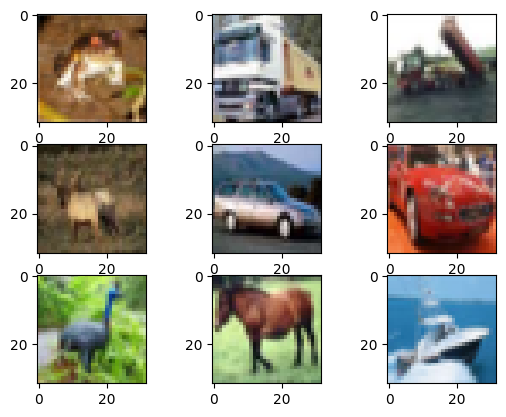

In [38]:
# Display some sample images from the dataset
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()



#How to Create One-Hot Vectors
Let's see how to create one-hot vectors using a simple example with the Keras to_categorical function.

In [8]:
from keras.utils import to_categorical
import numpy as np


### 2. Preprocessing the dataset

First things first, we need to preprocess the dataset so the images and labels are in a form that Keras can ingest. To start, we'll define a NumPy seed for reproducibility, then normalize the images.

Furthermore, we will also convert our class labels to one-hot vectors.  This is a standard output format for neural networks.

In [9]:
# Building a convolutional neural network for object recognition on CIFAR-10

# fix random seed for reproducibility
seed = 6
np.random.seed(seed)

# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize the inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
# class labels shape
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


The class labels are a single integer value (0-9).  What we really want is a one-hot vector of length ten.  For example, the class label of 6 should be denoted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0].  We can accomplish this using the np_utils.to_categorical() function.

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(10000, 1)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


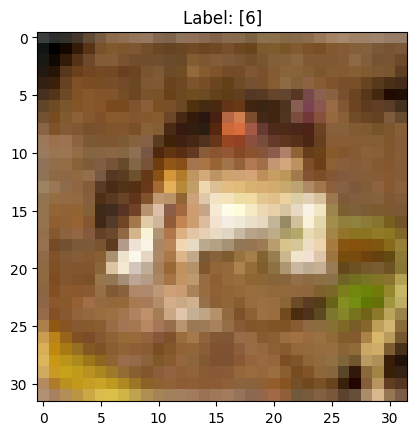

In [8]:
# Updated code using keras.utils.to_categorical
from keras.utils import to_categorical

# Hot encode outputs
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
num_classes = Y_test.shape[1]

# Print the shape of Y_train and the first one-hot encoded vector
print(Y_train.shape)
print(Y_train[0])
print(y_test.shape)
print(Y_test) # y_test and Y_test differents

# Display the first image in the training set
plt.imshow(x_train[0])
plt.title(f"Label: {y_train[0]}")
plt.show()


### 4. Defining Parameters and Training the Model

We're all set! We are ready to start training our network.  In the following cells, we will define our hyper parameters, such as learning rate and momentum, define an optimizer, compile the model, and fit the model to the training data.

170498071/170498071 [==============================] - 6s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 96)        2688      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 96)        83040     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 96)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 192)       166080    
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 192)       331968    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 192)         

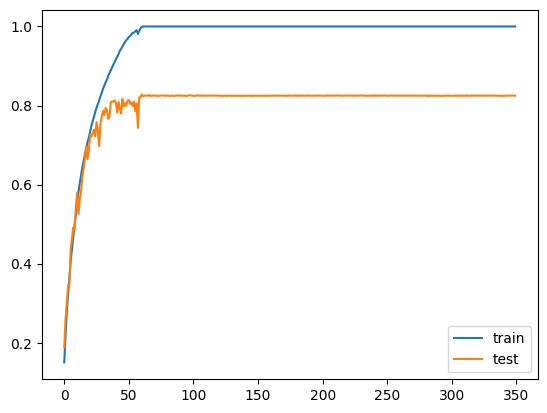

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import SGD


# Assume allcnn() is a function that builds and returns your CNN model
def allcnn():
    model = Sequential()
    model.add(Conv2D(96, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(96, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
    model.add(Conv2D(192, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(192, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
    model.add(Conv2D(192, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(192, (1, 1), activation='relu', padding='same'))
    model.add(Conv2D(10, (1, 1), activation='relu', padding='same'))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(10, activation='softmax'))
    return model

# Define hyperparameters
learning_rate = 0.01
momentum = 0.9
nesterov = True  # Set to True or False based on your preference

# Build model
model = allcnn()

# Define SGD optimizer
optimizer = 'SGD'

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print model summary
print(model.summary())

# Define additional training parameters
epochs = 350
batch_size = 32

# Fit the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, verbose=1)

# Plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()
